# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random

class Card: #individual playing cards  with their suits and values 
    SUITS = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    FACES = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    def __init__(self, suit, face):
        self.suit = suit
        self.face = face
    def __repr__(self): #card face of card suit
        return f"{self.face} of {self.suit}"

class Deck: #a deck of cards to contain all of the cards
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, face) for suit in Card.SUITS for face in Card.FACES] * num_decks
        self.plastic_card_index = random.randint(0, len(self.cards) - 1) # a way for the plastic card to be identify
        random.shuffle(self.cards) #shuffles the cards 
    def draw(self): #drawing a card from the deck
        card = self.cards.pop(self.plastic_card_index) 
        self.plastic_card_index = random.randint(0, len(self.cards) - 1) # a way to show that a card has been removed from the deck
        random.shuffle(self.cards) #makes sure that the cards shuffled after a card is drawn
        return card
    def shuffle(self): # shuffling the cards
        random.shuffle(self.cards)
    def __len__(self):
        return len(self.cards)

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [2]:
class Card: #class
    # attributes
    SUITS = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    FACES = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    def __init__(self, suit, face): # methods
        self.suit = suit
        self.face = face
    def __repr__(self):
        pass
class Deck: # class
    def __init__(self, num_decks=1): 
        self.cards = []  #attributes
        self.plastic_card_index = 0
        #method
    def draw(self):
        pass
    def shuffle(self):
        pass
    def __len__(self):
        pass


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [6]:
import random

# card class represents a single card
class Card:
    SUITS = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    FACES = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    def __init__(self, suit, face):
        self.suit = suit
        self.face = face
    def value(self):
        if self.face in ('J', 'Q', 'K'):
            return 10
        elif self.face == 'A':
            return 11
        else:
            return int(self.face)
    def __repr__(self):
        return f"{self.face} of {self.suit}"

# hand class represents the player's or dealer's hand
class Hand:
    def __init__(self):
        self.cards = []
    def add_card(self, card):
        self.cards.append(card)
    def value(self):
        total = 0
        aces = 0
        for card in self.cards:
            total += card.value()
            if card.face == 'A':
                aces += 1
        while total > 21 and aces > 0:
            total -= 10
            aces -= 1
        return total
    def bust(self):
        return self.value() > 21
    def is_blackjack(self):
        return len(self.cards) == 2 and self.value() == 21

# player class represents a general player 
class Player:
    def __init__(self, name):
        self.name = name
        self.hand = Hand()
        self.chips = 0
    def hit(self, deck):
        self.hand.add_card(deck.draw())
    def win(self, amount):
        self.chips += amount
    def lose(self, amount):
        self.chips -= amount
    def push(self):
        pass

# humanplayer inherits from player and handles human player's input
class HumanPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
    def hit_or_stand(self):
        while True:
            decision = input(f"{self.name}, do you want to hit or stand? (h/s): ").strip().lower()
            if decision in ['h', 'hit']:
                return True
            elif decision in ['s', 'stand']:
                return False
            else:
                print("Invalid input. Please enter 'h' for hit or 's' for stand.")

# dealerplayer inherits from player and handles the dealer's actions
class DealerPlayer(Player):
    def __init__(self):
        super().__init__("Dealer")
    def play(self, deck):
        while self.hand.value() < 17:
            self.hit(deck)

# deck class represents a deck of cards
class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, face) for suit in Card.SUITS for face in Card.FACES] * num_decks
        random.shuffle(self.cards)
    def draw(self):
        return self.cards.pop()
    def __len__(self):
        return len(self.cards)

# game class manages the flow of the game
class Game:
    def __init__(self, players):
        self.players = players
        self.dealer = DealerPlayer()
        self.deck = Deck()
    def deal_initial_hands(self):
        for _ in range(2):
            for player in self.players:
                player.hand.add_card(self.deck.draw())
            self.dealer.hand.add_card(self.deck.draw())
    def play_round(self):
        print("\n--- Round Start ---")
        # Players' turns
        for player in self.players:
            if isinstance(player, DealerPlayer):
                continue  # Skip dealer in this loop
            print(f"\n{player.name}'s turn:")
            while True:
                if player.hand.bust():
                    print(f"{player.name} busts with a score of {player.hand.value()}!")
                    break
                elif player.hand.is_blackjack():
                    print(f"{player.name} gets a blackjack with a score of {player.hand.value()}!")
                    break
                else:
                    if isinstance(player, HumanPlayer):
                        if player.hit_or_stand():
                            player.hit(self.deck)
                        else:
                            break
                    else:  # AI players hit if their hand value is below 17
                        if player.hand.value() < 17:
                            player.hit(self.deck)
                        else:
                            print(f"{player.name} stands with a score of {player.hand.value()}.")
                            break
        # dealer's turn
        print(f"\nDealer's turn:")
        self.dealer.play(self.deck)
        print(f"Dealer's final hand: {self.dealer.hand.value()}")
        # determining winners and losers
        dealer_score = self.dealer.hand.value()
        print(f"Dealer's hand: {dealer_score}")
        for player in self.players:
            if isinstance(player, DealerPlayer):
                continue  # Skip dealer in this loop
            player_score = player.hand.value()
            print(f"{player.name}'s hand: {player_score}")
            if player.hand.bust():
                print(f"{player.name} busts and loses the round!")
                player.lose(10)
            elif player.hand.is_blackjack():
                print(f"{player.name} wins with a blackjack!")
                player.win(20)
            elif dealer_score > 21 or player_score > dealer_score:
                print(f"{player.name} wins the round!")
                player.win(10)
            elif player_score < dealer_score:
                print(f"{player.name} loses the round!")
                player.lose(10)
            else:
                print(f"{player.name} ties with the dealer!")
                player.push()
        # reset hands for the next round
        for player in self.players:
            player.hand = Hand()
        self.dealer.hand = Hand()


# main gameplay
def main():
    strategy_player = HumanPlayer("Strategy Player")
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    game = Game([strategy_player] + other_players)
    initial_chips = 100
    for player in game.players:
        player.chips = initial_chips
    rounds_to_play = 5  # play up to 5 rounds
    for round_num in range(rounds_to_play):
        print(f"\n--- Round {round_num + 1} ---")
        game.deck = Deck()  # Re-initialize the deck for each round
        game.deal_initial_hands()  # Deal initial hands
        game.play_round()  # Play the round
        # check if the strategy player is out of money
        if strategy_player.chips <= 0:
            print(f"{strategy_player.name} is out of chips!")
            break
        print(f"{strategy_player.name} has {strategy_player.chips} chips remaining.")
        print("-" * 50)

if __name__ == "__main__":
    main()



--- Round 1 ---

--- Round Start ---

Strategy Player's turn:


Strategy Player, do you want to hit or stand? (h/s):  hit


Strategy Player busts with a score of 25!

Player 1's turn:
Player 1 stands with a score of 21.

Player 2's turn:
Player 2 stands with a score of 19.

Player 3's turn:
Player 3 stands with a score of 18.

Dealer's turn:
Dealer's final hand: 19
Dealer's hand: 19
Strategy Player's hand: 25
Strategy Player busts and loses the round!
Player 1's hand: 21
Player 1 wins the round!
Player 2's hand: 19
Player 2 ties with the dealer!
Player 3's hand: 18
Player 3 loses the round!
Strategy Player has 90 chips remaining.
--------------------------------------------------

--- Round 2 ---

--- Round Start ---

Strategy Player's turn:


Strategy Player, do you want to hit or stand? (h/s):  stand



Player 1's turn:
Player 1 stands with a score of 21.

Player 2's turn:
Player 2 stands with a score of 19.

Player 3's turn:
Player 3 stands with a score of 19.

Dealer's turn:
Dealer's final hand: 21
Dealer's hand: 21
Strategy Player's hand: 17
Strategy Player loses the round!
Player 1's hand: 21
Player 1 ties with the dealer!
Player 2's hand: 19
Player 2 loses the round!
Player 3's hand: 19
Player 3 loses the round!
Strategy Player has 80 chips remaining.
--------------------------------------------------

--- Round 3 ---

--- Round Start ---

Strategy Player's turn:


Strategy Player, do you want to hit or stand? (h/s):  hit
Strategy Player, do you want to hit or stand? (h/s):  stand



Player 1's turn:
Player 1 stands with a score of 19.

Player 2's turn:
Player 2 stands with a score of 17.

Player 3's turn:
Player 3 stands with a score of 19.

Dealer's turn:
Dealer's final hand: 18
Dealer's hand: 18
Strategy Player's hand: 21
Strategy Player wins the round!
Player 1's hand: 19
Player 1 wins the round!
Player 2's hand: 17
Player 2 loses the round!
Player 3's hand: 19
Player 3 wins the round!
Strategy Player has 90 chips remaining.
--------------------------------------------------

--- Round 4 ---

--- Round Start ---

Strategy Player's turn:


Strategy Player, do you want to hit or stand? (h/s):  hit
Strategy Player, do you want to hit or stand? (h/s):  stand



Player 1's turn:
Player 1 busts with a score of 26!

Player 2's turn:
Player 2 busts with a score of 23!

Player 3's turn:
Player 3 stands with a score of 18.

Dealer's turn:
Dealer's final hand: 21
Dealer's hand: 21
Strategy Player's hand: 20
Strategy Player loses the round!
Player 1's hand: 26
Player 1 busts and loses the round!
Player 2's hand: 23
Player 2 busts and loses the round!
Player 3's hand: 18
Player 3 loses the round!
Strategy Player has 80 chips remaining.
--------------------------------------------------

--- Round 5 ---

--- Round Start ---

Strategy Player's turn:


Strategy Player, do you want to hit or stand? (h/s):  stand



Player 1's turn:
Player 1 stands with a score of 18.

Player 2's turn:
Player 2 stands with a score of 20.

Player 3's turn:
Player 3 busts with a score of 25!

Dealer's turn:
Dealer's final hand: 23
Dealer's hand: 23
Strategy Player's hand: 17
Strategy Player wins the round!
Player 1's hand: 18
Player 1 wins the round!
Player 2's hand: 20
Player 2 wins the round!
Player 3's hand: 25
Player 3 busts and loses the round!
Strategy Player has 90 chips remaining.
--------------------------------------------------


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [7]:
class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2):
        super().__init__(name)
        self.threshold = threshold  # Threshold for hitting or standing
        self.card_count = 0  # Tracks the card count based on the strategy

    def update_card_count(self, card):
        """Updates the card count based on the card's value."""
        if card.face in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.face in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1
        # Cards 7, 8, 9 don't affect the card count (value 0)

    def hit_or_stand(self):
        """Decides whether to hit or stand based on the card count."""
        if self.card_count <= self.threshold:
            return True  # Hit if card count is negative or below the threshold
        else:
            return False  # Stand if card count is above the threshold

    def hit(self, deck):
        """Overrides the hit method to update card count after hitting."""
        card = deck.draw()
        self.hand.add_card(card)
        self.update_card_count(card)
        print(f"{self.name} hits with {card} (Card count: {self.card_count})")

    def stand(self):
        """Overrides the stand method."""
        print(f"{self.name} stands (Card count: {self.card_count})")


In [8]:
# create a player using the card counting strategy
player = CardCountingPlayer(name="Card Counter", threshold=-2)

# create a deck 
deck = Deck()

# start a round
player.hit(deck)  # player draws a card
if not player.hit_or_stand():  # check if player should stand
    player.stand()


Card Counter hits with 9 of Clubs (Card count: 0)
Card Counter stands (Card count: 0)


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [14]:
import random

class Card:
    SUITS = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    FACES = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, suit, face):
        self.suit = suit
        self.face = face
    
    def value(self):
        """Returns the value of the card in blackjack."""
        if self.face in ['J', 'Q', 'K']:
            return 10
        elif self.face == 'A':
            return 11
        else:
            return int(self.face)
    
    def __repr__(self):
        return f"{self.face} of {self.suit}"

class Hand:
    def __init__(self):
        self.cards = []
    
    def add_card(self, card):
        self.cards.append(card)
    
    def value(self):
        """Calculates the total value of the hand."""
        total = 0
        aces = 0
        for card in self.cards:
            total += card.value()
            if card.face == 'A':
                aces += 1
        while total > 21 and aces > 0:
            total -= 10
            aces -= 1
        return total
    
    def bust(self):
        """Returns True if hand is over 21."""
        return self.value() > 21
    
    def is_blackjack(self):
        """Returns True if hand is exactly 21."""
        return len(self.cards) == 2 and self.value() == 21

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def hit(self, deck):
        self.hand.add_card(deck.draw())
    
    def stand(self):
        pass
    
    def win(self, amount):
        self.chips += amount
    
    def lose(self, amount):
        self.chips -= amount

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=100):
        super().__init__(name, chips)
        self.threshold = threshold
        self.card_count = 0
    
    def update_card_count(self, card):
        """Updates the card count based on the card's value."""
        if card.face in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.face in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1
    
    def hit_or_stand(self):
        """Decides whether to hit or stand based on the card count."""
        if self.card_count <= self.threshold:
            return True  # Hit if card count is negative or below the threshold
        else:
            return False  # Stand if card count is above the threshold

    def hit(self, deck):
        """Overrides the hit method to update card count after hitting."""
        card = deck.draw()
        self.hand.add_card(card)
        self.update_card_count(card)

    def stand(self):
        pass

class Dealer(Player):
    def __init__(self, name="Dealer"):
        super().__init__(name)
    
    def hit(self, deck):
        """Dealer hits until hand value is 17 or more."""
        while self.hand.value() < 17:
            self.hand.add_card(deck.draw())
    
    def stand(self):
        pass

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, face) for suit in Card.SUITS for face in Card.FACES] * num_decks
        random.shuffle(self.cards)
    
    def draw(self):
        return self.cards.pop()

class Game:
    def __init__(self, players, dealer):
        self.players = players
        self.dealer = dealer
        self.deck = Deck()
    
    def deal_initial_hands(self):
        """Deals two cards to each player and the dealer."""
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    
    def play_round(self):
        """Plays a round of the game for each player and the dealer."""
        # player's turn
        for player in self.players:
            if isinstance(player, CardCountingPlayer):
                while not player.hand.bust() and player.hit_or_stand():
                    player.hit(self.deck)
            else:
                # Other players hit until they have 17 or more
                while not player.hand.bust() and player.hand.value() < 17:
                    player.hit(self.deck)
        
        # dealer's turn
        self.dealer.hit(self.deck)
        if not self.dealer.hand.bust():
            print(f"Dealer's hand: {self.dealer.hand.value()}")

        # Determine winner
        dealer_score = self.dealer.hand.value()
        for player in self.players:
            player_score = player.hand.value()
            if player_score > 21:
                print(f"{player.name} busts with {player_score}. Dealer wins!")
                player.lose(10)
            elif dealer_score > 21 or player_score > dealer_score:
                print(f"{player.name} wins with {player_score}!")
                player.win(10)
            elif player_score < dealer_score:
                print(f"Dealer wins with {dealer_score}. {player.name} loses.")
                player.lose(10)
            else:
                print(f"{player.name} and Dealer tie!")
    
    def reset(self):
        """Resets the game for the next round."""
        self.deck = Deck()  # Re-initialize the deck
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

def main():
    # create players
    strategy_player = CardCountingPlayer("Card Counter", threshold=-2)
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    dealer = Dealer()
    # create game instance
    game = Game([strategy_player] + other_players, dealer)
    # initial chips for all players
    initial_chips = 100
    for player in game.players:
        player.chips = initial_chips
    # play 50 rounds or until the strategy player runs out of chips
    rounds = 50
    for round_num in range(rounds):
        print(f"--- Round {round_num + 1} ---")
        if strategy_player.chips <= 0:
            print(f"{strategy_player.name} is out of money!")
            break
        game.deal_initial_hands()
        game.play_round()
        game.reset()  # reset for the next round
    # print final winnings of the strategy player
    print(f"Final Chips for {strategy_player.name}: {strategy_player.chips}")

if __name__ == "__main__":
    main()


--- Round 1 ---
Dealer's hand: 18
Dealer wins with 18. Card Counter loses.
Player 1 busts with 22. Dealer wins!
Player 2 wins with 19!
Player 3 wins with 19!
--- Round 2 ---
Dealer's hand: 19
Dealer wins with 19. Card Counter loses.
Player 1 wins with 20!
Player 2 busts with 23. Dealer wins!
Player 3 busts with 23. Dealer wins!
--- Round 3 ---
Card Counter wins with 7!
Player 1 wins with 20!
Player 2 wins with 18!
Player 3 wins with 18!
--- Round 4 ---
Dealer's hand: 19
Dealer wins with 19. Card Counter loses.
Dealer wins with 19. Player 1 loses.
Player 2 wins with 21!
Player 3 wins with 20!
--- Round 5 ---
Dealer's hand: 18
Dealer wins with 18. Card Counter loses.
Player 1 busts with 23. Dealer wins!
Player 2 and Dealer tie!
Player 3 wins with 21!
--- Round 6 ---
Card Counter wins with 18!
Player 1 wins with 20!
Player 2 wins with 19!
Player 3 wins with 20!
--- Round 7 ---
Dealer's hand: 21
Dealer wins with 21. Card Counter loses.
Dealer wins with 21. Player 1 loses.
Dealer wins with 

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


Average winnings after 50 rounds: 4.0
Standard deviation of winnings: 14.966629547095765
Probability of net winning: 0.0
Probability of net losing: 1.0


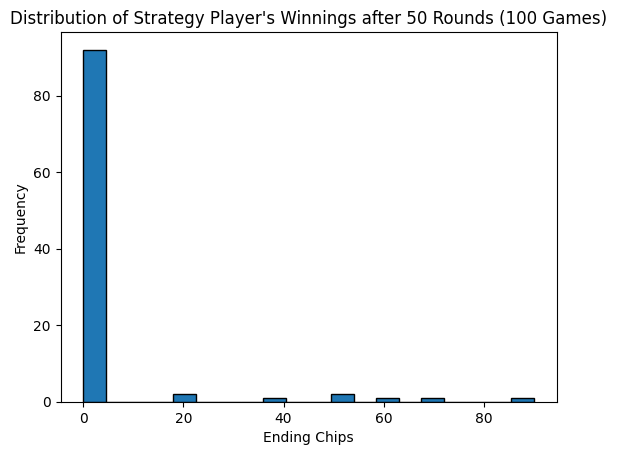

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Card:
    SUITS = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    FACES = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, suit, face):
        self.suit = suit
        self.face = face
    def value(self):
        if self.face in ['J', 'Q', 'K']:
            return 10
        elif self.face == 'A':
            return 11
        else:
            return int(self.face)
    def __repr__(self):
        return f"{self.face} of {self.suit}"

class Hand:
    def __init__(self):
        self.cards = []
    def add_card(self, card):
        self.cards.append(card)
    def value(self):
        total = 0
        aces = 0
        for card in self.cards:
            total += card.value()
            if card.face == 'A':
                aces += 1
        while total > 21 and aces > 0:
            total -= 10
            aces -= 1
        return total
    def bust(self):
        return self.value() > 21

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = Hand()
    def hit(self, deck):
        self.hand.add_card(deck.draw())
    def stand(self):
        pass
    def win(self, amount):
        self.chips += amount
    def lose(self, amount):
        self.chips -= amount

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=100):
        super().__init__(name, chips)
        self.threshold = threshold
        self.card_count = 0
    def update_card_count(self, card):
        if card.face in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.face in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1
    def hit_or_stand(self):
        if self.card_count <= self.threshold:
            return True  # hit if card count is negative or below the threshold
        else:
            return False  # stand if card count is above the threshold
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        self.update_card_count(card)
    def stand(self):
        pass

class Dealer(Player):
    def __init__(self, name="Dealer"):
        super().__init__(name)
    def hit(self, deck):
        while self.hand.value() < 17:
            self.hand.add_card(deck.draw())
    def stand(self):
        pass

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, face) for suit in Card.SUITS for face in Card.FACES] * num_decks
        random.shuffle(self.cards)
    def draw(self):
        return self.cards.pop()

class Game:
    def __init__(self, players, dealer):
        self.players = players
        self.dealer = dealer
        self.deck = Deck()
    def deal_initial_hands(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    def play_round(self):
        # player's turn
        for player in self.players:
            if isinstance(player, CardCountingPlayer):
                while not player.hand.bust() and player.hit_or_stand():
                    player.hit(self.deck)
            else:
                # other players hit until they have 17 or more
                while not player.hand.bust() and player.hand.value() < 17:
                    player.hit(self.deck)
        # dealer's turn
        self.dealer.hit(self.deck)
        # determine winner
        dealer_score = self.dealer.hand.value()
        for player in self.players:
            player_score = player.hand.value()
            if player_score > 21:
                player.lose(10)  # busts
            elif dealer_score > 21 or player_score > dealer_score:
                player.win(10)   # player wins
            elif player_score < dealer_score:
                player.lose(10)  # dealer wins
            else:
                pass  # tie
    
    def reset(self):
        self.deck = Deck()  # reinitialize the deck
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

def run_simulation(num_games=100, num_rounds=50):
    strategy_player_winnings = []
    for game_num in range(num_games):
        strategy_player = CardCountingPlayer("Card Counter", threshold=-2)
        other_players = [Player(f"Player {i+1}") for i in range(3)]
        dealer = Dealer()
        # create game instance
        game = Game([strategy_player] + other_players, dealer)
        # initial chips for all players
        initial_chips = 100
        for player in game.players:
            player.chips = initial_chips
        # play 50 rounds or until the strategy player runs out of chips
        for round_num in range(num_rounds):
            if strategy_player.chips <= 0:
                break
            game.deal_initial_hands()
            game.play_round()
            game.reset()  # reset for the next round
        # store the strategy player's chips at the end of the game
        strategy_player_winnings.append(strategy_player.chips)
    return strategy_player_winnings

def analyze_winnings(winnings):
    # calculate average winnings per round
    avg_winnings = np.mean(winnings)
    print(f"Average winnings after 50 rounds: {avg_winnings}")
    # calculate standard deviation
    std_dev = np.std(winnings)
    print(f"Standard deviation of winnings: {std_dev}")
    # calculate probability of net winning or losing
    winning_probability = np.sum(np.array(winnings) > 100) / len(winnings)
    losing_probability = np.sum(np.array(winnings) < 100) / len(winnings)
    print(f"Probability of net winning: {winning_probability}")
    print(f"Probability of net losing: {losing_probability}")
    # plot histogram of winnings 
    plt.hist(winnings, bins=20, edgecolor='black')
    plt.xlabel("Ending Chips")
    plt.ylabel("Frequency")
    plt.title("Distribution of Strategy Player's Winnings after 50 Rounds (100 Games)")
    plt.show()

def main():
    # run the simulation of 100 games
    winnings = run_simulation()

    # analyze the winnings
    analyze_winnings(winnings)

if __name__ == "__main__":
    main()


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Threshold: -1 | Average winnings after 50 rounds: 3.3
Threshold: -1 | Standard deviation of winnings: 13.715319901482431
Threshold: -1 | Probability of net winning: 0.0
Threshold: -1 | Probability of net losing: 1.0
Threshold: -2 | Average winnings after 50 rounds: 10.6
Threshold: -2 | Standard deviation of winnings: 29.65872552892319
Threshold: -2 | Probability of net winning: 0.03
Threshold: -2 | Probability of net losing: 0.95
Threshold: -3 | Average winnings after 50 rounds: 11.3
Threshold: -3 | Standard deviation of winnings: 29.27985655702568
Threshold: -3 | Probability of net winning: 0.03
Threshold: -3 | Probability of net losing: 0.97
Threshold: -4 | Average winnings after 50 rounds: 7.7
Threshold: -4 | Standard deviation of winnings: 19.331580380300004
Threshold: -4 | Probability of net winning: 0.0
Threshold: -4 | Probability of net losing: 1.0
Threshold: -5 | Average winnings after 50 rounds: 7.7
Threshold: -5 | Standard deviation of winnings: 22.53242108607062
Threshold: -

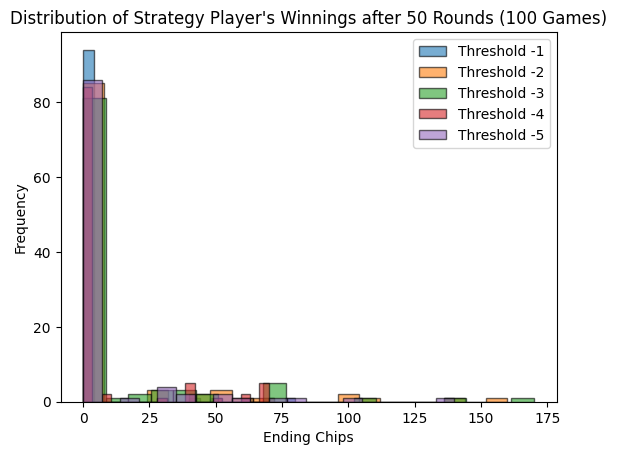

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Card:
    SUITS = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    FACES = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, suit, face):
        self.suit = suit
        self.face = face
    def value(self):
        if self.face in ['J', 'Q', 'K']:
            return 10
        elif self.face == 'A':
            return 11
        else:
            return int(self.face)
    def __repr__(self):
        return f"{self.face} of {self.suit}"

class Hand:
    def __init__(self):
        self.cards = []
    def add_card(self, card):
        self.cards.append(card)
    def value(self):
        total = 0
        aces = 0
        for card in self.cards:
            total += card.value()
            if card.face == 'A':
                aces += 1
        while total > 21 and aces > 0:
            total -= 10
            aces -= 1
        return total
    def bust(self):
        return self.value() > 21

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = Hand()
    def hit(self, deck):
        self.hand.add_card(deck.draw())
    def stand(self):
        pass
    def win(self, amount):
        self.chips += amount
    def lose(self, amount):
        self.chips -= amount

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=100):
        super().__init__(name, chips)
        self.threshold = threshold
        self.card_count = 0
    def update_card_count(self, card):
        if card.face in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.face in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1
    def hit_or_stand(self):
        if self.card_count <= self.threshold:
            return True  # hit if card count is negative or below the threshold
        else:
            return False  # stand if card count is above the threshold
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        self.update_card_count(card)
    def stand(self):
        pass

class Dealer(Player):
    def __init__(self, name="Dealer"):
        super().__init__(name)
    def hit(self, deck):
        while self.hand.value() < 17:
            self.hand.add_card(deck.draw())
    def stand(self):
        pass

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, face) for suit in Card.SUITS for face in Card.FACES] * num_decks
        random.shuffle(self.cards)
    def draw(self):
        return self.cards.pop()

class Game:
    def __init__(self, players, dealer):
        self.players = players
        self.dealer = dealer
        self.deck = Deck()
    def deal_initial_hands(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
    def play_round(self):
        # player's turn
        for player in self.players:
            if isinstance(player, CardCountingPlayer):
                while not player.hand.bust() and player.hit_or_stand():
                    player.hit(self.deck)
            else:
                # other players hit until they have 17 or more
                while not player.hand.bust() and player.hand.value() < 17:
                    player.hit(self.deck)
        # dealer's turn
        self.dealer.hit(self.deck)
        # determine winner
        dealer_score = self.dealer.hand.value()
        for player in self.players:
            player_score = player.hand.value()
            if player_score > 21:
                player.lose(10)  # busts
            elif dealer_score > 21 or player_score > dealer_score:
                player.win(10)   # player wins
            elif player_score < dealer_score:
                player.lose(10)  # dealer wins
            else:
                pass  # tie
    
    def reset(self):
        self.deck = Deck()  # reinitialize the deck
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

def run_simulation_for_threshold(threshold, num_games=100, num_rounds=50):
    strategy_player_winnings = []

    for game_num in range(num_games):
        strategy_player = CardCountingPlayer("Card Counter", threshold=threshold)
        other_players = [Player(f"Player {i+1}") for i in range(3)]
        dealer = Dealer()
        # create game instance
        game = Game([strategy_player] + other_players, dealer)
        # initial chips for all players
        initial_chips = 100
        for player in game.players:
            player.chips = initial_chips 
        # play 50 rounds or until the strategy player runs out of chips
        for round_num in range(num_rounds):
            if strategy_player.chips <= 0:
                break
            game.deal_initial_hands()
            game.play_round()
            game.reset()  # reset for the next round
        # store the strategy player's chips at the end of the game
        strategy_player_winnings.append(strategy_player.chips)
    return strategy_player_winnings

def analyze_winnings(winnings, threshold):
    # calculate average winnings per round
    avg_winnings = np.mean(winnings)
    print(f"Threshold: {threshold} | Average winnings after 50 rounds: {avg_winnings}")
    # calculate standard deviation
    std_dev = np.std(winnings)
    print(f"Threshold: {threshold} | Standard deviation of winnings: {std_dev}")
    # calculate probability of net winning or losing
    winning_probability = np.sum(np.array(winnings) > 100) / len(winnings)
    losing_probability = np.sum(np.array(winnings) < 100) / len(winnings)
    print(f"Threshold: {threshold} | Probability of net winning: {winning_probability}")
    print(f"Threshold: {threshold} | Probability of net losing: {losing_probability}")
    # plot histogram of winnings 
    plt.hist(winnings, bins=20, edgecolor='black', alpha=0.6, label=f"Threshold {threshold}")

def main():
    # thresholds test
    thresholds = [-1, -2, -3, -4, -5]
    # run the simulation for each threshold and analyze the results
    for threshold in thresholds:
        winnings = run_simulation_for_threshold(threshold)
        analyze_winnings(winnings, threshold)
    # show the histogram for all thresholds
    plt.xlabel("Ending Chips")
    plt.ylabel("Frequency")
    plt.title("Distribution of Strategy Player's Winnings after 50 Rounds (100 Games)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

Risk-Averse Player Average winnings after 50 rounds: 59.8
Risk-Averse Player Standard deviation of winnings: 58.3091759502739
Risk-Averse Player Probability of net winning: 0.2
Risk-Averse Player Probability of net losing: 0.74


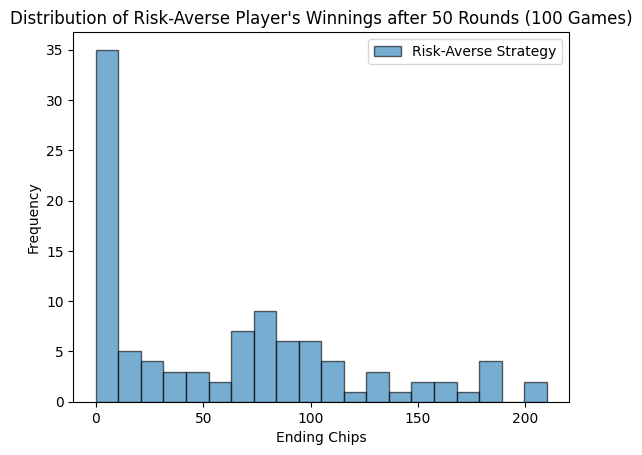

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt

# card, hand, player, dealer, deck classes stay the same

class RiskAversePlayer(Player):
    def __init__(self, name, chips=100):
        super().__init__(name, chips)
        self.card_count = 0
    def update_card_count(self, card):
        if card.face in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.face in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1
    def hit_or_stand(self):
        hand_value = self.hand.value()
        # if hand value is less than 17, use a more aggressive threshold
        if hand_value <= 16:
            threshold = -2  # more aggressive, hit when threshold is -2
        else:
            threshold = -1  # more conservative, stand when threshold is -1
        if self.card_count <= threshold:
            return True  # hit if card count is negative or below the threshold
        else:
            return False  # stand if card count is above the threshold
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        self.update_card_count(card)
    def stand(self):
        pass

# game and Deck classes stays the same

def run_simulation_for_risk_averse(num_games=100, num_rounds=50):
    risk_averse_player_winnings = []
    for game_num in range(num_games):
        risk_averse_player = RiskAversePlayer("Risk Averse Player")
        other_players = [Player(f"Player {i+1}") for i in range(3)]
        dealer = Dealer()
        # create game instance
        game = Game([risk_averse_player] + other_players, dealer)
        # initial chips for all players
        initial_chips = 100
        for player in game.players:
            player.chips = initial_chips
        # play 50 rounds or until the risk-averse player runs out of chips
        for round_num in range(num_rounds):
            if risk_averse_player.chips <= 0:
                break
            game.deal_initial_hands()
            game.play_round()
            game.reset()  # reset 
        # store the risk-averse player's chips at the end of the game
        risk_averse_player_winnings.append(risk_averse_player.chips)

    return risk_averse_player_winnings

def analyze_risk_averse_winnings(winnings):
    # calculate average winnings per round
    avg_winnings = np.mean(winnings)
    print(f"Risk-Averse Player Average winnings after 50 rounds: {avg_winnings}")
    # calculate standard deviation
    std_dev = np.std(winnings)
    print(f"Risk-Averse Player Standard deviation of winnings: {std_dev}")
    # calculate probability of net winning or losing
    winning_probability = np.sum(np.array(winnings) > 100) / len(winnings)
    losing_probability = np.sum(np.array(winnings) < 100) / len(winnings)
    print(f"Risk-Averse Player Probability of net winning: {winning_probability}")
    print(f"Risk-Averse Player Probability of net losing: {losing_probability}")
    # plot histogram of winnings
    plt.hist(winnings, bins=20, edgecolor='black', alpha=0.6, label="Risk-Averse Strategy")

def main():
    winnings = run_simulation_for_risk_averse()
    analyze_risk_averse_winnings(winnings)
    # show the histogram for risk-averse strategy
    plt.xlabel("Ending Chips")
    plt.ylabel("Frequency")
    plt.title("Distribution of Risk-Averse Player's Winnings after 50 Rounds (100 Games)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
